***Mounting Drive***

<hr>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [2]:
import sys
print(sys.path)

['/tensorflow-1.15.0/python3.6', '', '/env/python', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/dist-packages/IPython/extensions', '/root/.ipython']


In [0]:
sys.path.append('/content/gdrive/My Drive/EVA/')
sys.path.append('/content/gdrive/My Drive/EVA/Models')
sys.path.append('/content/gdrive/My Drive/EVA/Transforms')

***Loading the python files from drive***


In [0]:
from imports_eva import *
import torch_transform as Tloader                 # Loading CIFAR10 data into train/test dataloaders
import resnet18 as mfile                          # ResNet18 Model architecture
import train_test_functions as ttfunc             # Model training and validation functions
import test_performance as tperform               # Class wise model accuracy and confusion matrix plot
import model_plots as mp                          # Plotting the Train/Test plots for loss and accuracy
import misclassified                              # Display misclassified images by the trained model
import Albumentation_transform as Aloader
import QuizDNN as quiz         # Albumentation transform

***Loading CIFAR data and creating test/train loaders with augumentations***
<hr>

In [5]:
trainloader, testloader = Aloader.train_test_loaders(128)   #arguments are batchsize, rotation value

Files already downloaded and verified
Files already downloaded and verified
Train Images count 50000
Test Images count 10000


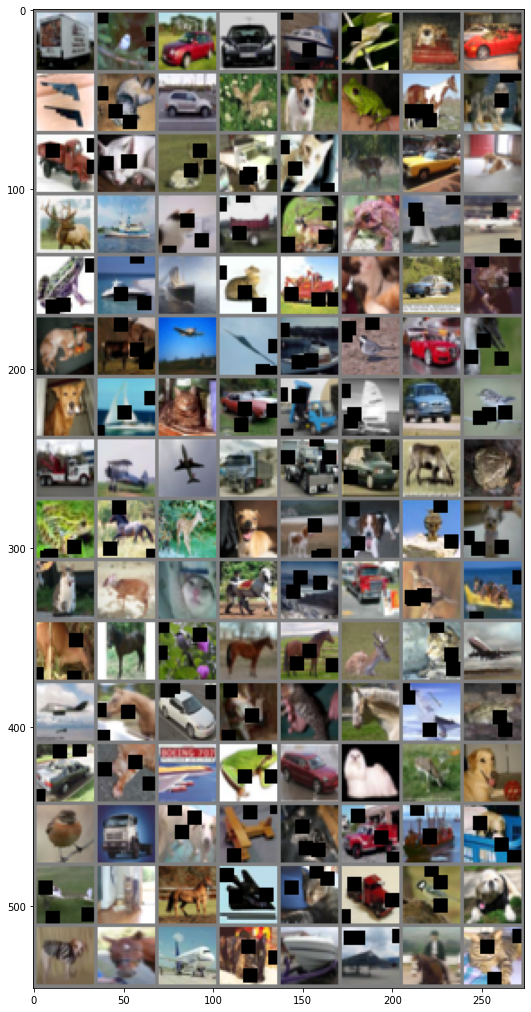

In [6]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(28,18))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

***Define the final target classes in CIFAR***


In [0]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [8]:
from datetime import datetime

print("Current Date/Time: ", datetime.now())

Current Date/Time:  2020-03-21 10:15:54.551039


***Load QUIZ model and print summary***
<hr>

In [9]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = quiz.Net().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           9,216
       BatchNorm2d-6           [-1, 32, 32, 32]              64
              ReLU-7           [-1, 32, 32, 32]               0
           Dropout-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 32, 32, 32]           9,216
      BatchNorm2d-10           [-1, 32, 32, 32]              64
             ReLU-11           [-1, 32, 32, 32]               0
          Dropout-12           [-1, 32, 32, 32]               0
        MaxPool2d-13           [-1, 32, 16, 16]               0
           Conv2d-14           [-1

***Model Training***
---
<hr>

In [10]:
from torch.optim.lr_scheduler import MultiStepLR
train_acc = []
train_loss = []
val_acc = []
val_loss = []

model = quiz.Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=0.0001)
#scheduler = MultiStepLR(optimizer, milestones=[7,12], gamma=0.1)

EPOCHS = 15
for epoch in range(EPOCHS):
    print("Current Date/Time: ", datetime.now())
    print("EPOCH:", epoch+1)
    ttfunc.train(model, device, trainloader, optimizer, epoch)
    ttfunc.test(model, device, testloader, classes)
    #scheduler.step()
    print('')

  0%|          | 0/391 [00:00<?, ?it/s]

Current Date/Time:  2020-03-21 10:15:58.686071
EPOCH: 1


Loss=0.9296846389770508 Batch_id=390 Accuracy=43.37: 100%|██████████| 391/391 [00:23<00:00, 16.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0118, Accuracy: 4534/10000 (45.34%)


Current Date/Time:  2020-03-21 10:16:23.966935
EPOCH: 2


Loss=0.9057374000549316 Batch_id=390 Accuracy=60.10: 100%|██████████| 391/391 [00:23<00:00, 16.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0091, Accuracy: 5687/10000 (56.87%)


Current Date/Time:  2020-03-21 10:16:49.448152
EPOCH: 3


Loss=0.7662442922592163 Batch_id=390 Accuracy=66.42: 100%|██████████| 391/391 [00:24<00:00, 16.25it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0075, Accuracy: 6659/10000 (66.59%)


Current Date/Time:  2020-03-21 10:17:15.345599
EPOCH: 4


Loss=0.892155647277832 Batch_id=390 Accuracy=70.48: 100%|██████████| 391/391 [00:24<00:00, 15.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0062, Accuracy: 7284/10000 (72.84%)


Current Date/Time:  2020-03-21 10:17:42.140528
EPOCH: 5


Loss=0.8407682180404663 Batch_id=390 Accuracy=73.39: 100%|██████████| 391/391 [00:25<00:00, 15.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0078, Accuracy: 6624/10000 (66.24%)


Current Date/Time:  2020-03-21 10:18:09.252637
EPOCH: 6


Loss=0.8599976301193237 Batch_id=390 Accuracy=75.20: 100%|██████████| 391/391 [00:25<00:00, 15.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0064, Accuracy: 7234/10000 (72.34%)


Current Date/Time:  2020-03-21 10:18:36.170926
EPOCH: 7


Loss=0.6668157577514648 Batch_id=390 Accuracy=76.82: 100%|██████████| 391/391 [00:24<00:00, 15.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0055, Accuracy: 7600/10000 (76.00%)


Current Date/Time:  2020-03-21 10:19:02.796104
EPOCH: 8


Loss=0.6767939329147339 Batch_id=390 Accuracy=78.33: 100%|██████████| 391/391 [00:25<00:00, 15.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 7626/10000 (76.26%)


Current Date/Time:  2020-03-21 10:19:29.980575
EPOCH: 9


Loss=0.6774873733520508 Batch_id=390 Accuracy=79.30: 100%|██████████| 391/391 [00:24<00:00, 15.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 7653/10000 (76.53%)


Current Date/Time:  2020-03-21 10:19:56.773923
EPOCH: 10


Loss=0.5477292537689209 Batch_id=390 Accuracy=80.51: 100%|██████████| 391/391 [00:24<00:00, 15.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 7653/10000 (76.53%)


Current Date/Time:  2020-03-21 10:20:23.314664
EPOCH: 11


Loss=0.4806397557258606 Batch_id=390 Accuracy=81.14: 100%|██████████| 391/391 [00:25<00:00, 15.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 7895/10000 (78.95%)


Current Date/Time:  2020-03-21 10:20:50.376648
EPOCH: 12


Loss=0.45757412910461426 Batch_id=390 Accuracy=81.79: 100%|██████████| 391/391 [00:24<00:00, 15.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 8044/10000 (80.44%)


Current Date/Time:  2020-03-21 10:21:16.816907
EPOCH: 13


Loss=0.6217159032821655 Batch_id=390 Accuracy=82.40: 100%|██████████| 391/391 [00:24<00:00, 16.15it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8134/10000 (81.34%)


Current Date/Time:  2020-03-21 10:21:42.889965
EPOCH: 14


Loss=0.5259655117988586 Batch_id=390 Accuracy=83.12: 100%|██████████| 391/391 [00:23<00:00, 16.42it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 8081/10000 (80.81%)


Current Date/Time:  2020-03-21 10:22:08.489327
EPOCH: 15


Loss=0.43484440445899963 Batch_id=390 Accuracy=83.50: 100%|██████████| 391/391 [00:23<00:00, 16.51it/s]



Test set: Average loss: 0.0045, Accuracy: 8053/10000 (80.53%)




***Checking test data performance/results***
<hr>

------------------------------------------------------------
Model accuracy on 10000 test images: 80.53%
------------------------------------------------------------
 
Category   - Accuracy
plane      - 86.50
car        - 86.40
bird       - 60.30
cat        - 67.10
deer       - 96.40
dog        - 51.50
frog       - 92.10
horse      - 79.80
ship       - 94.50
truck      - 90.70
 


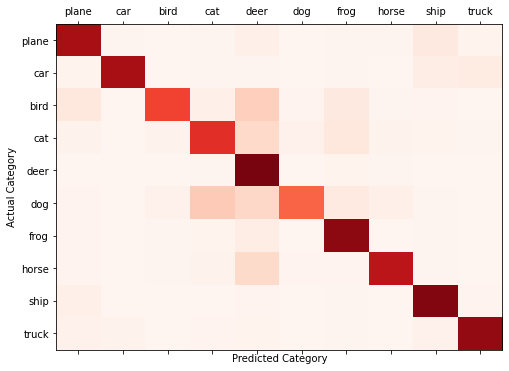

In [11]:
tperform.test_performance(model, testloader, device, classes)

***Show misclassified TEST images***
<hr>

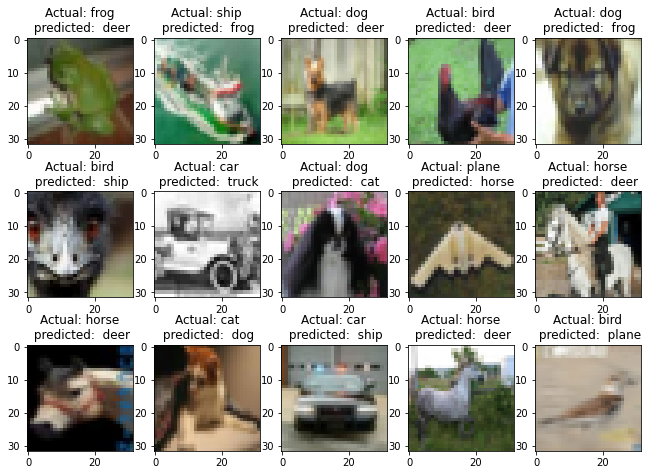

In [12]:
images, actuals, preds = misclassified.test_misclassified(model,device,testloader)
misclassified.plot_images(images, actuals, preds, classes)